# Мультимодальные модели

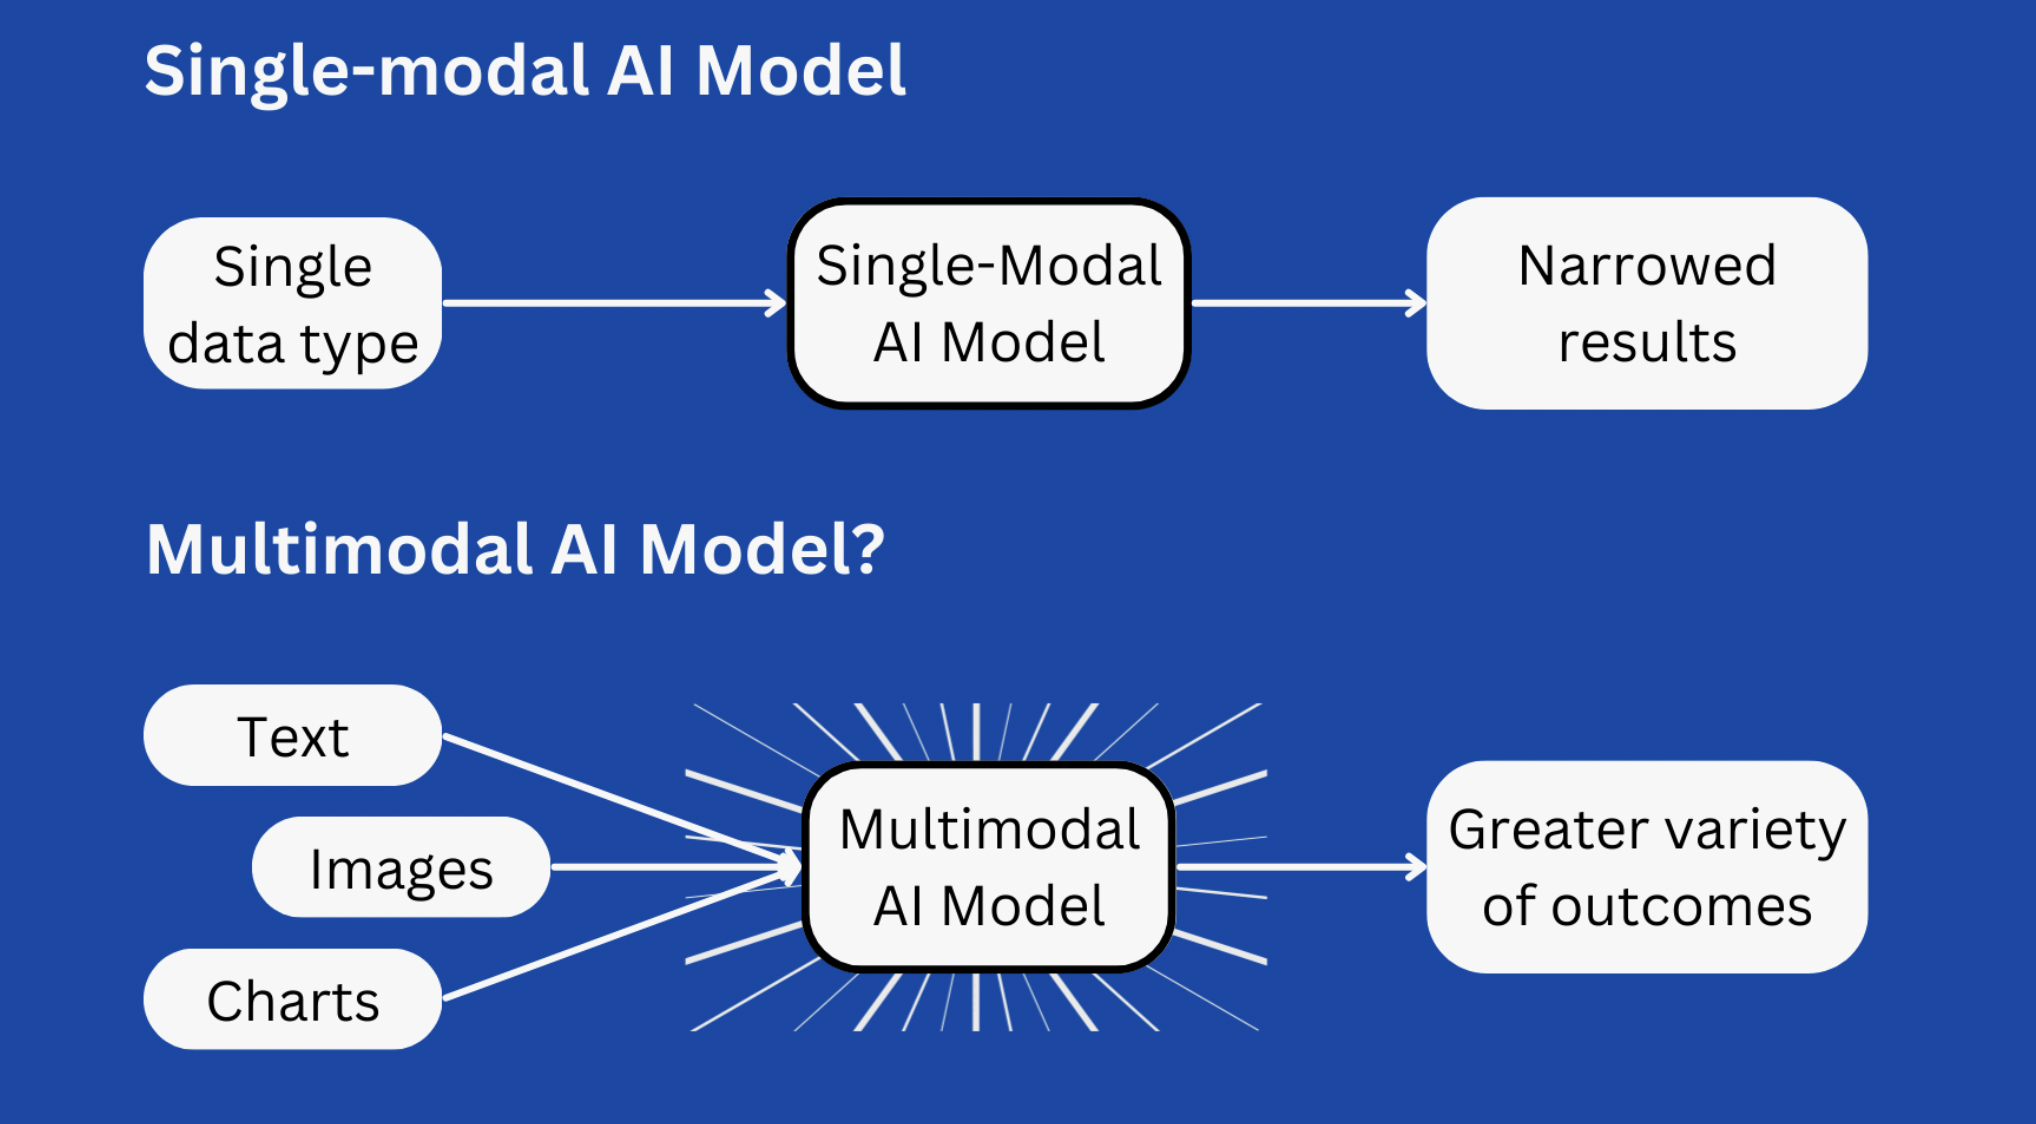

## Визуальные мультимодальные модели

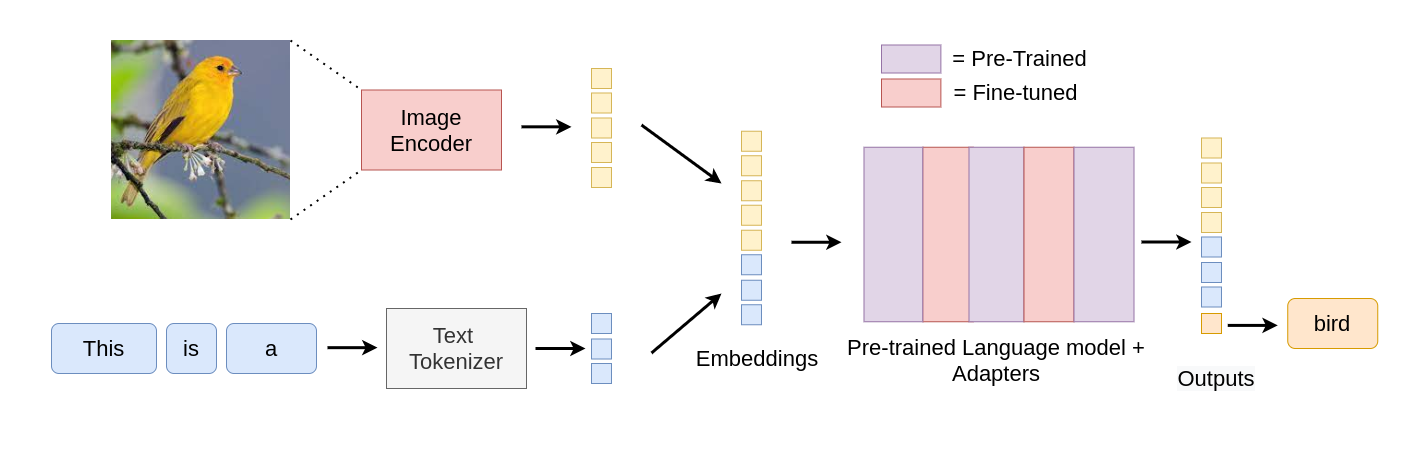

### Какие задачи решает?

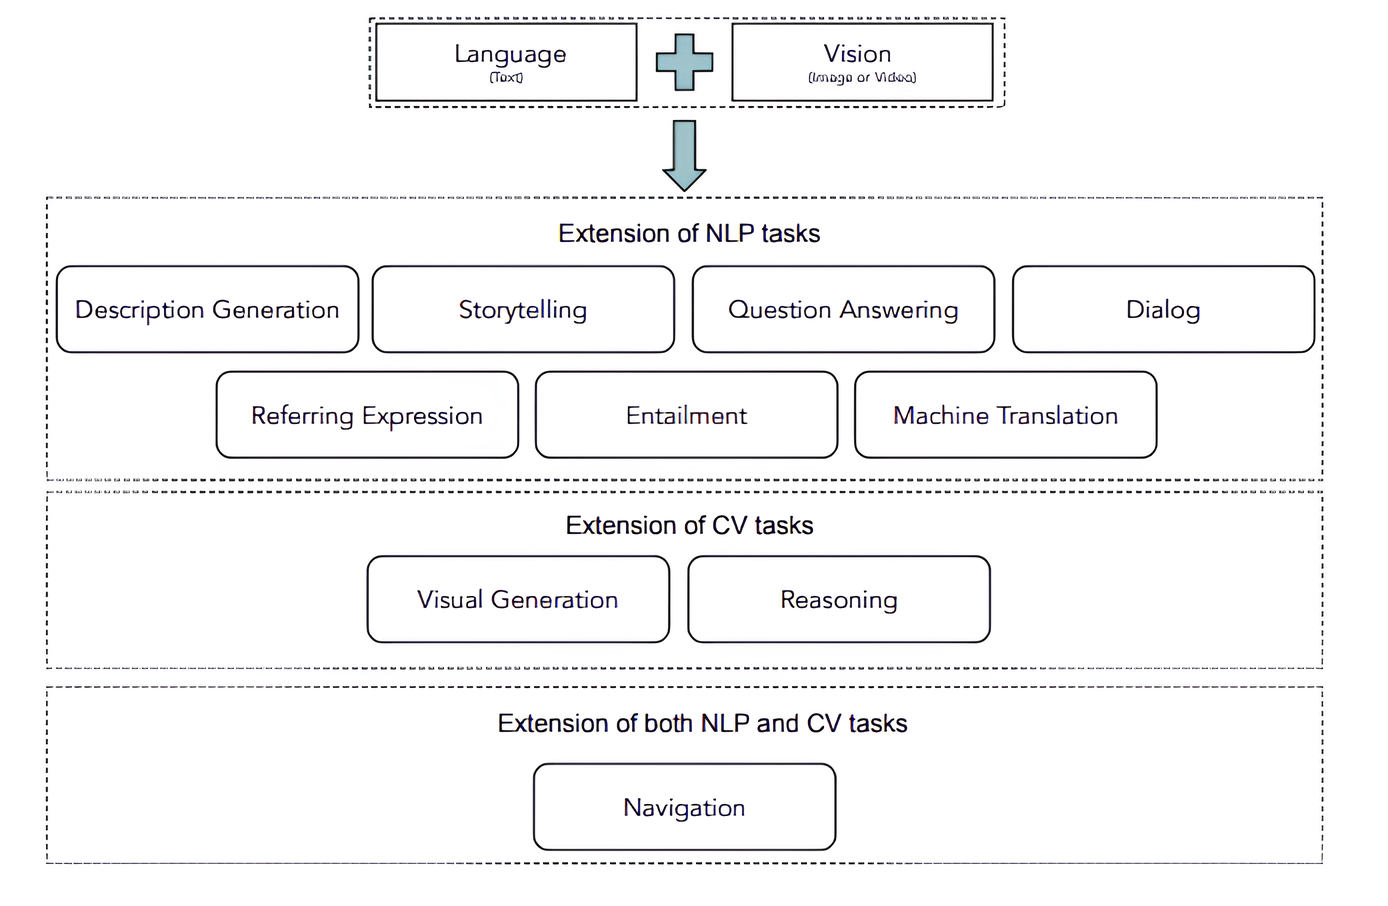

#### VQA, Visual Question Answering

это процесс, где ответ на вопрос генерируется с учетом визуальных входных данных (изображений или видео)

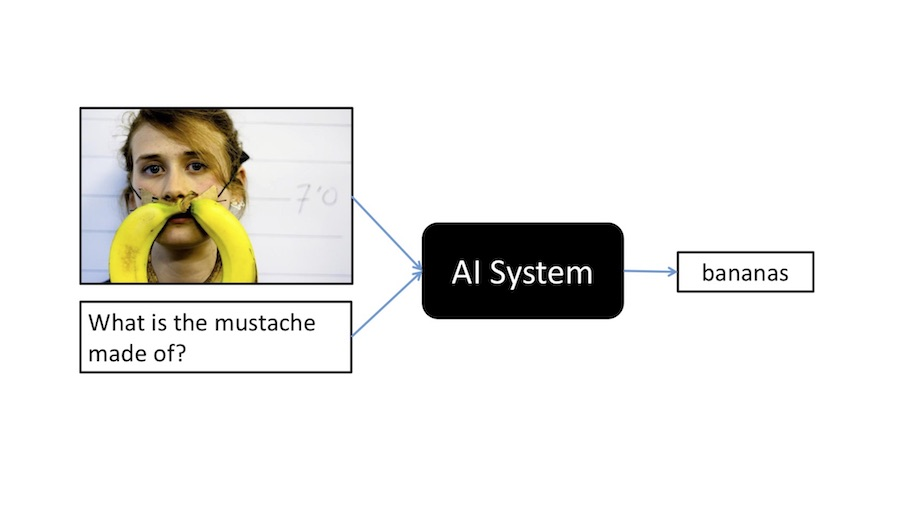

#### VC, Visual Captioning

это процесс, где генерируется описание к визуальным входным данным

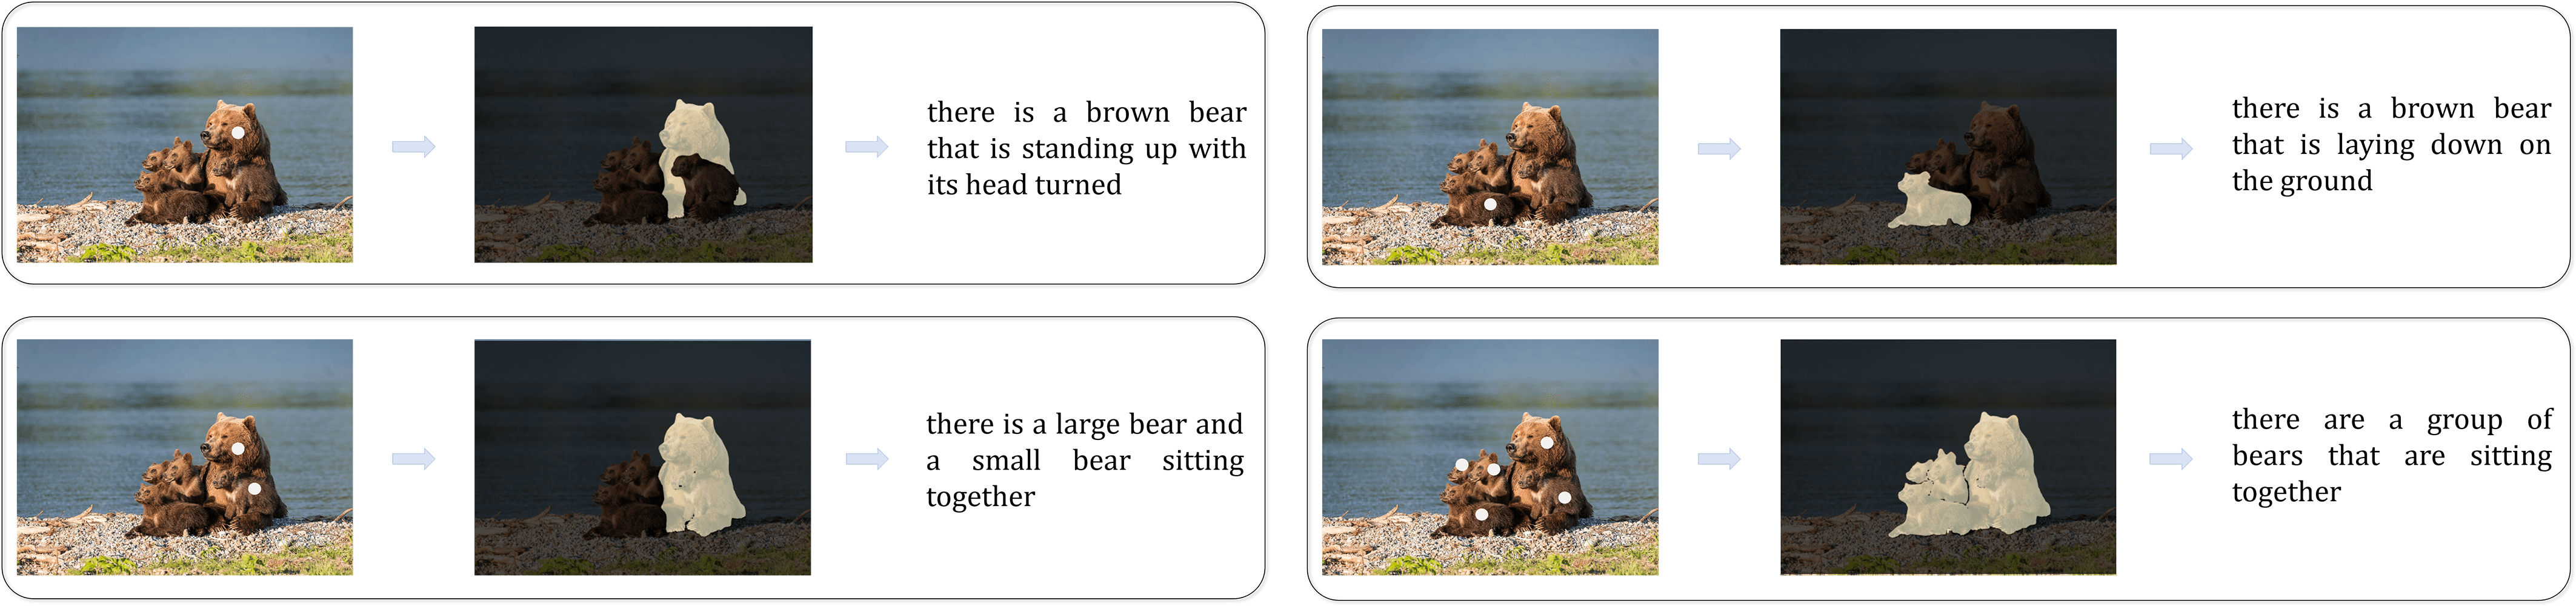

#### VCR, Visual Commonsense Reasoning

процесс, где визуальные данные интерпретируются с точки зрения общего понимания и когнитивного восприятия

#### VG, Visual Generation

процесс, при котором визуальные данные создаются на основе текстового запроса

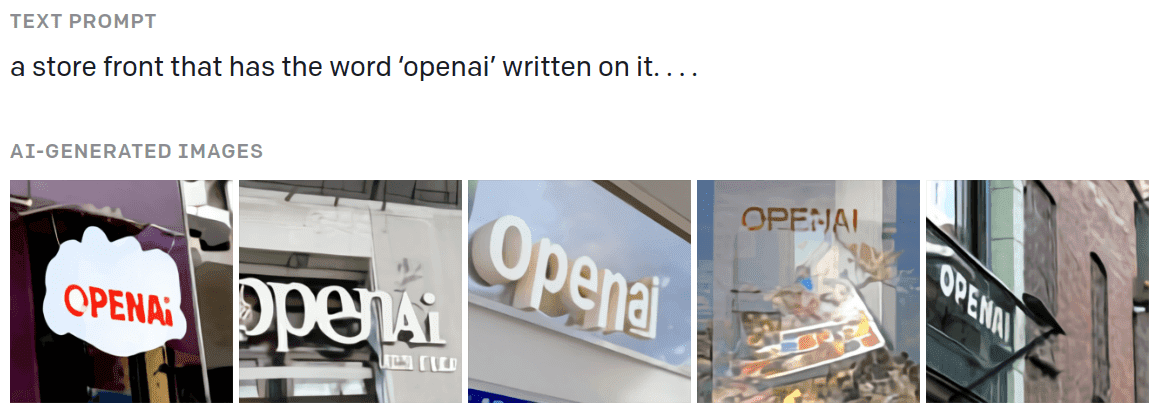

#### MAC, Multimodal Affective Computing

интерпретация визуальных эмоциональных проявлений на основе визуальных и текстовых данных или, в некотором смысле, мультимодальный анализ настроения

#### NLVR, Natural Language for Visual Reasoning

оценка истинности того или иного утверждения о визуальных входных данных

#### VR, Visual Retrieval

сбор изображений исключительно на основании текстового описания

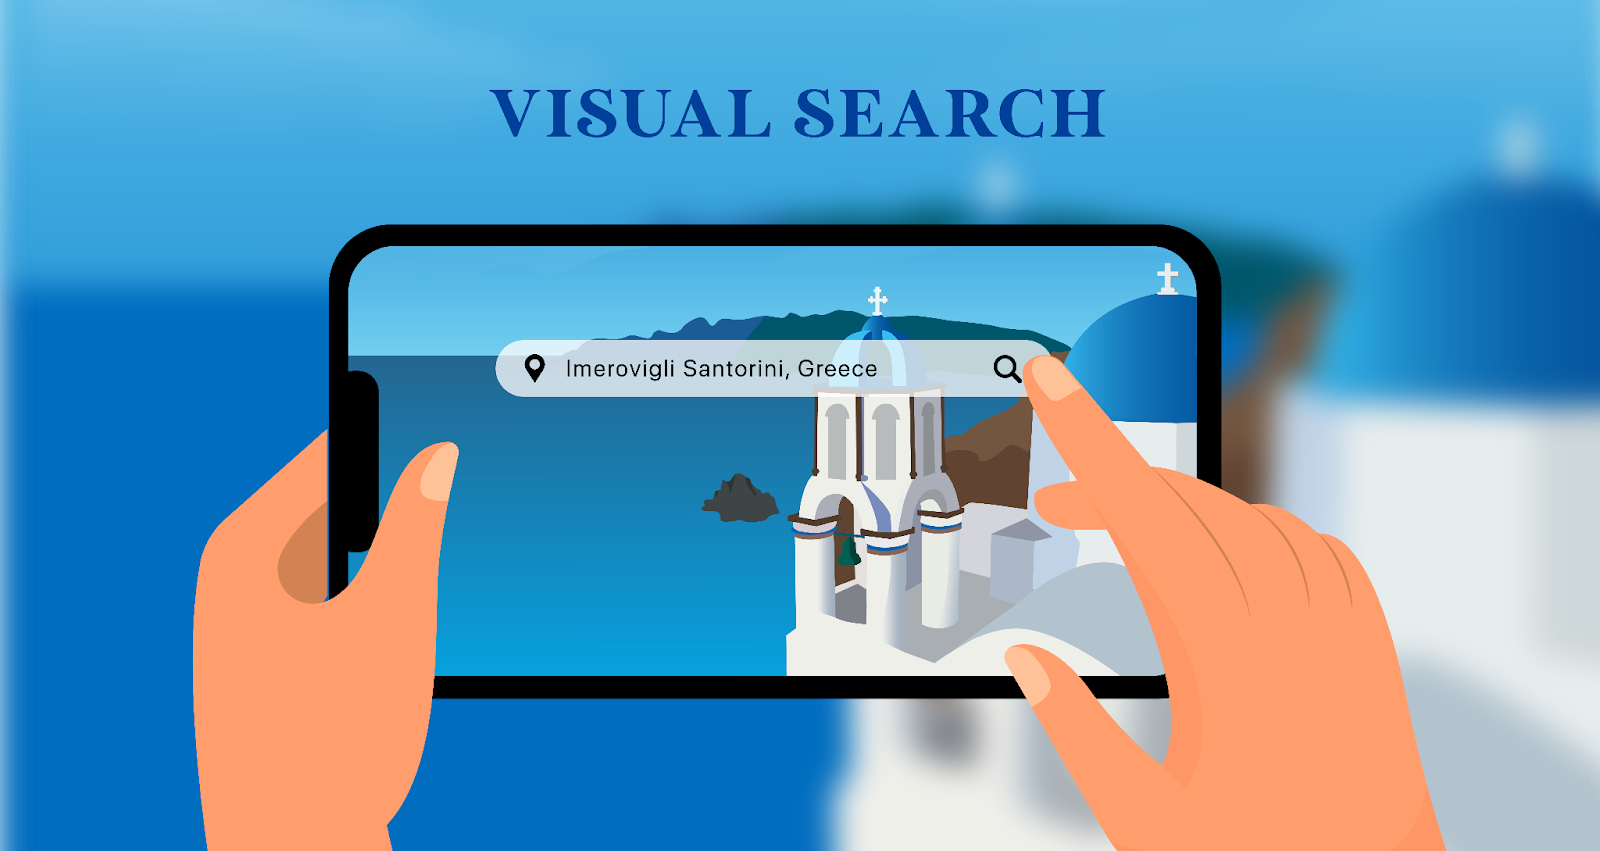

#### VLN, Vision-Language Navigation

движение в пространстве, которым программа управляет на основе текстовых инструкций

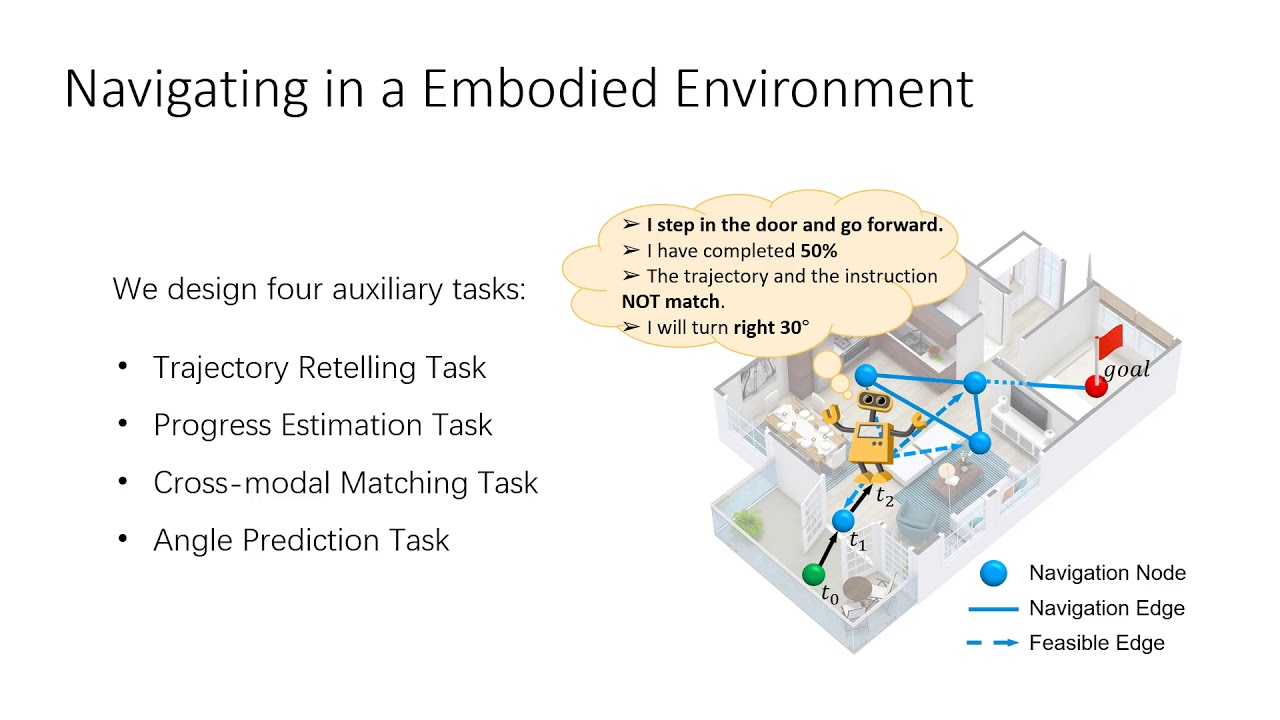

#### MMT, Multimodal Machine Translation

перевод описания с одного языка на другой с учетом дополнительной визуальной информации


### Какие архитектуры используются?

#### Двухпотоковые модели: ViLBERT

«Двухпотоковая модель» обозначает VL-модели, где текст и изображения обрабатываются в двух отдельных модулях. В эту категорию входят ViLBERT и LXMERT.

При обучении ViLBERT используются пары «изображение + текст». Текст кодируется через токены и позиционные эмбеддинги — стандартные для трансформеров процессы. Затем он обрабатывается в модуле внутреннего внимания (self-attention) трансформера. Изображение декомпозируется до отдельных, неперекрывающих друг друга фрагментов, которые затем представляются в виде векторов, подобно эмбеддингам фрагментов из визуальных трансформеров.

Для обучения с использованием пар «изображение + текст» используется модуль co-attention — он определяет значения важности по обоим эмбеддингам — изображений, и текста.

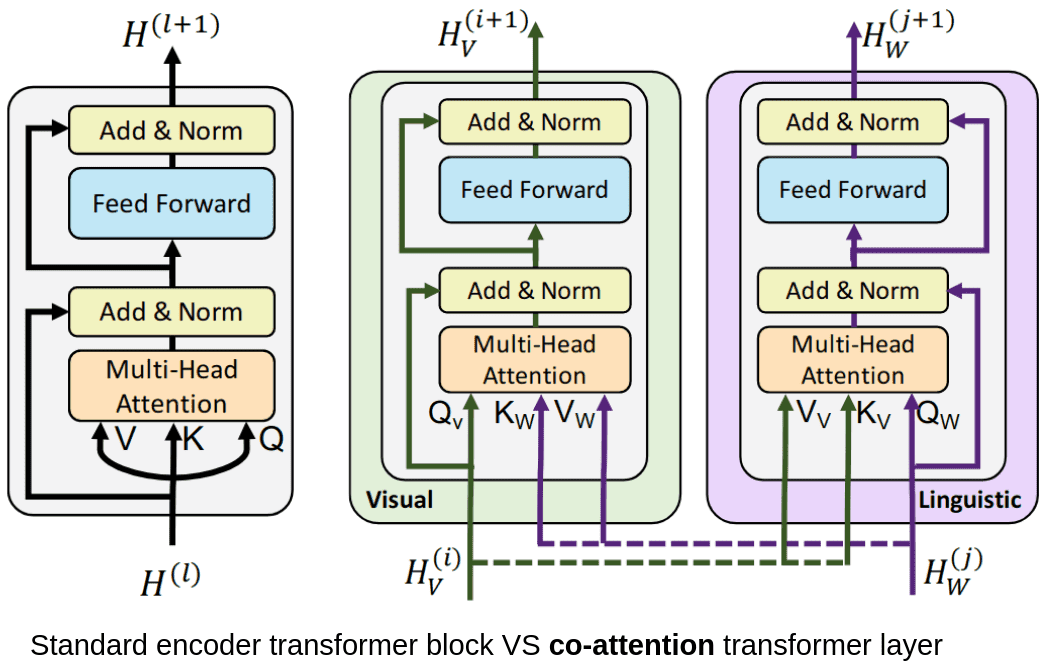

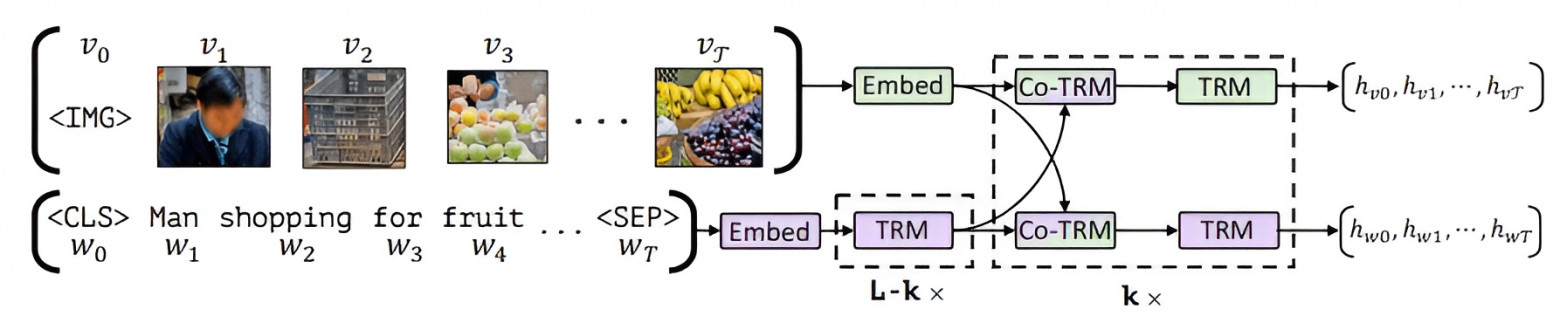

#### Однопотоковые модели

Модели типа VisualBERT, VL-BERT, UNITER работают иначе — они с обеими модальностями работают внутри одного модуля. Например, в VisualBERT используется трансформер, который объединяет области изображения с текстом и обнаруживает соответствия между ними. То есть к стандартной модели BERT добавляются эмбеддинги визуальных данных. В состав эмбеддинга входят:

- представление визуальных характеристик области изображения, генерируется через CNN;

- эмбеддинг фрагмента, который позволяет отличать эмбеддинг изображения от эмбеддинга текста;

- позиционный эмбеддинг, который устанавливает соответствие между областью изображения и словами, если они есть во входных данных.

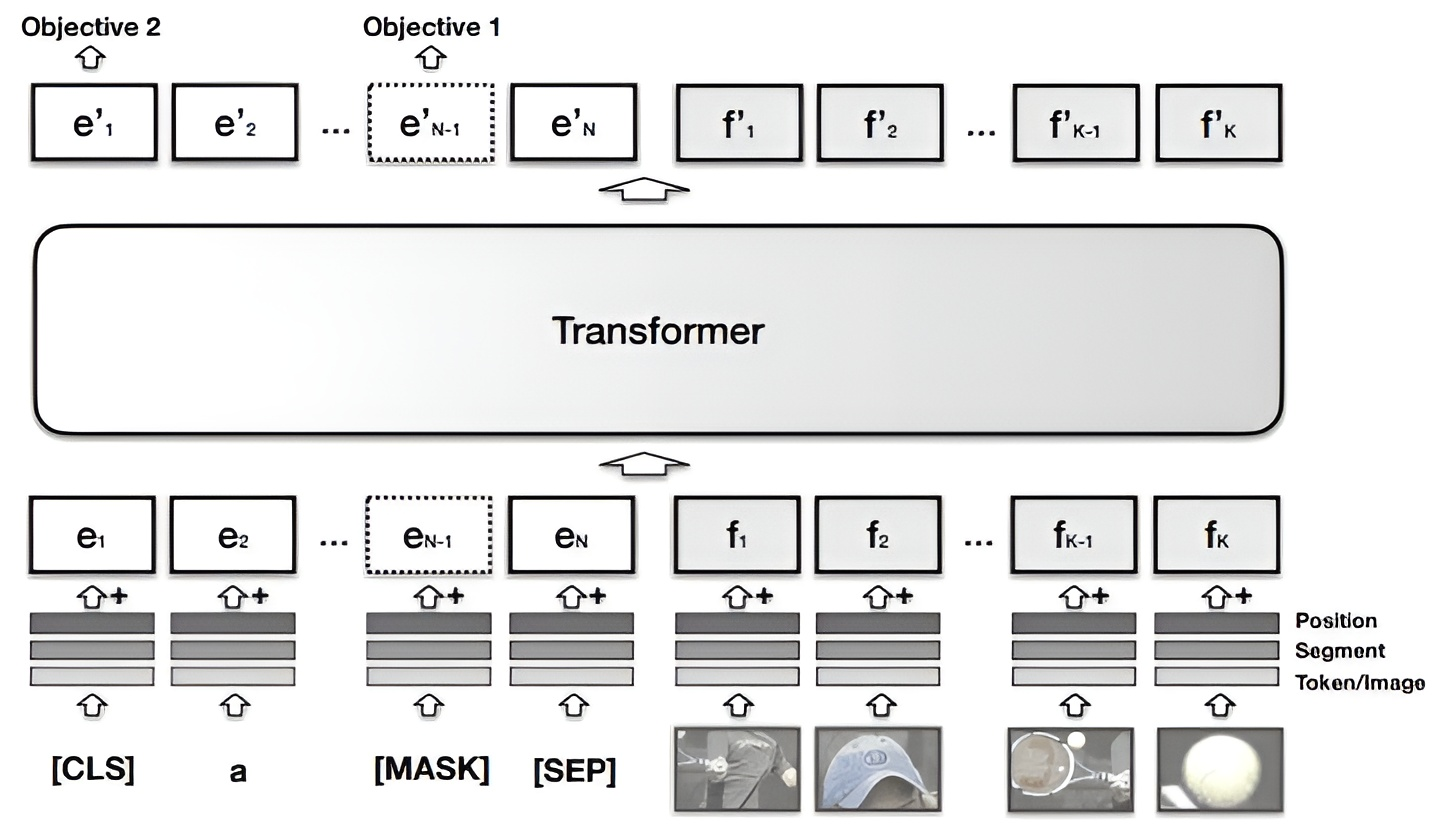

### Как их обучать?

- Маскированное языковое моделирование (Masked Language Modeling) часто применяется, когда трансформер обучается только на тексте. Токены входного текста маскируются рандомно. Модель учится предугадывать значения замаскированных токенов (слов). В случае с BERT, модель может использовать соседние токены в качестве контекста благодаря двунаправленному обучению.

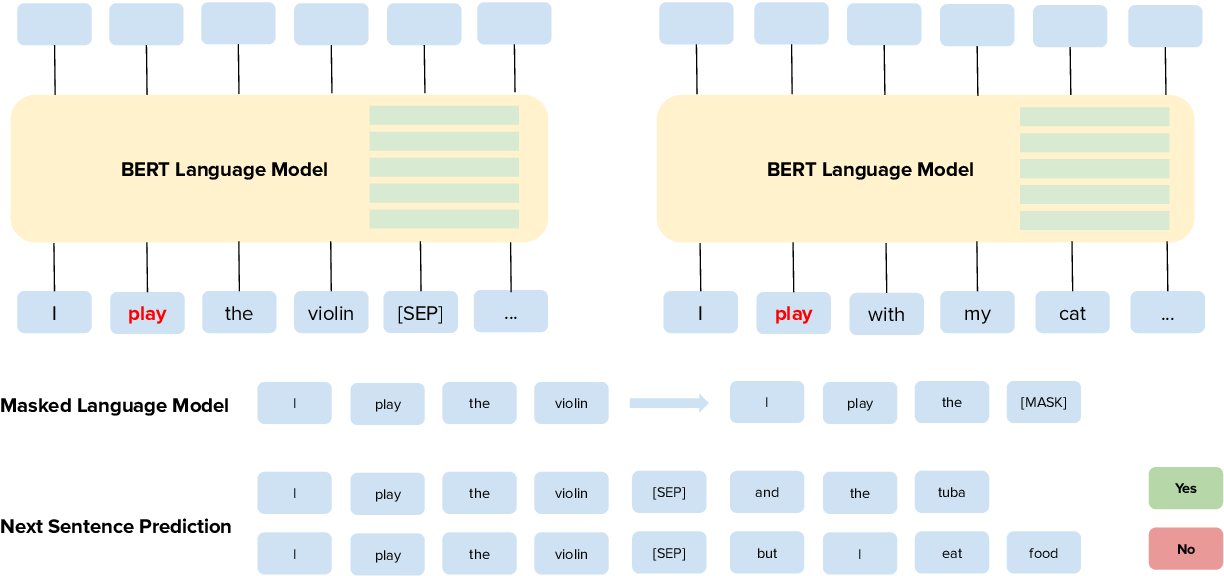

- Прогнозирование следующего предложения (Next Sequence Prediction) тоже применимо только для текста в качестве входных данных; здесь оценивается, подходит ли то или иное предложение в качестве продолжения входного. Обучаясь на верных и ложных предложениях, модель может выявлять долгосрочные зависимости.

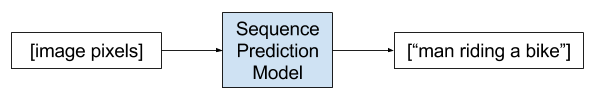

- Маскированное моделирование области (Masked Region Modeling): аналогично маскированному языковому моделированию, здесь маскируются области изображения. Модель учится предугадывать характеристики замаскированной области.

- Сопоставление изображения и текста (Image-Text Matching): модель учится прогнозировать, подойдет ли предложение для конкретного изображения.

- Соотношение слова и области (Word-Region Alignment): модель ищет соответствия между словами и областями изображения.

- Маскированная классификация областей (Masked Region Classification): модель предугадывает класс объекта на каждой замаскированной области изображения.

- Регрессия признаков замаскированной области (Masked Region Feature Regression): модель связывает замаскированную область изображения с ее визуальными признаками

- Предобучение VL-модели без учителя обычно предполагает, что модель предобучается на входных данных одной модальности, то есть без подготовленных пар «изображение + текст». Но затем, уже при тонкой настройке, она полноценно «доучивается с учителем».

- Многозадачное обучение — модель обучается на нескольких задачах одновременно, чтобы изученное в рамках одной задачи применялось в другой.

- Контрастное обучение применяется, чтобы модель в полуавтоматическом режиме изучала эмбеддинги визуально-семантических данных. Основная идея — изучить пространство эмбеддингов, где схожие пары располагаются близко друг к другу, а непохожие — далеко.

- Zero-shot learning (обучение с нуля) — в момент вывода данных модель обобщает информацию и применяет ее к еще незнакомым классам.

### Генеративные модели VL

#### DALL-E

DALL-E используется для визуальной генерации (VG) и создает точные изображения на основе текстового описания. Обучение также производится на основе пар «изображение + текст».

DALL-E использует скрытый вариационный автоэнкодер (dVAE), чтобы преобразовывать изображения в токены. В отличие от стандартного VAE, dVAE в основном использует скрытое пространство. Текст токенизируется через кодирование пар байтов. Токены изображения и текста объединяются и обрабатываются как единый поток данных.

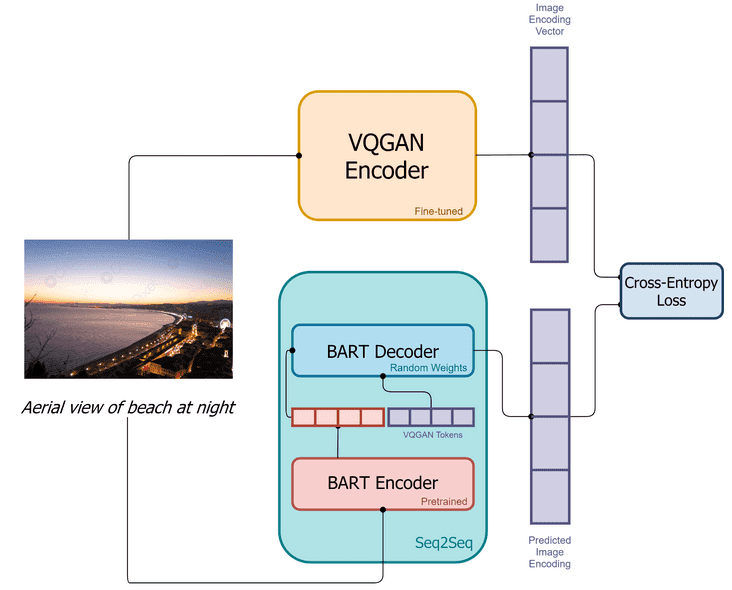

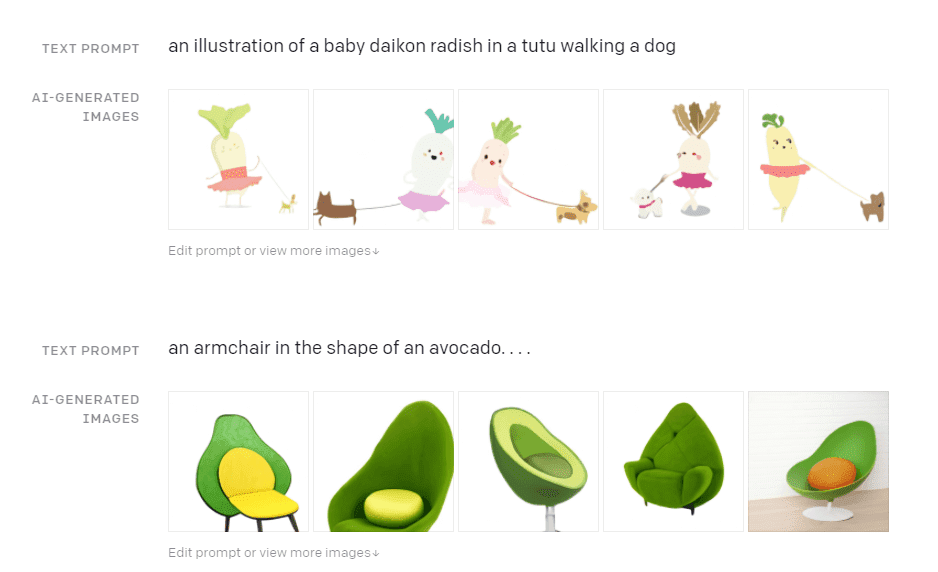

### GLIDE

Как и DALL-E, GLIDE — это еще одна генеративная модель, но по производительности она превосходит предыдущие. GLIDE — это, по свой структуре, диффузионная модель.

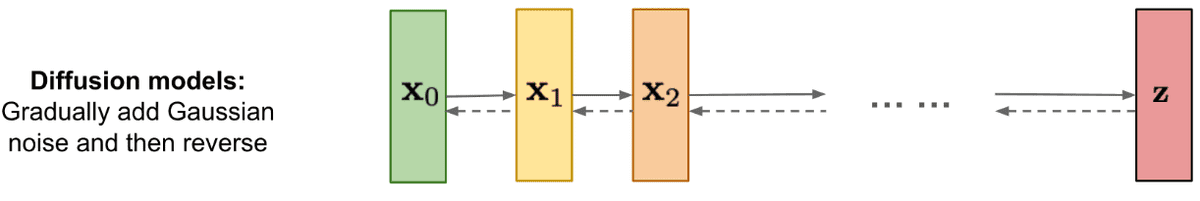

### VL-модели с контрастным обучением

CLIP решает задачу использования естественного языка в оценке визуальных данных (NLVR, Natural Language for Visual Reasoning), и пытается соотносить изображение с конкретной меткой на основе контекста. Обычно метка — это фраза или предложение, описывающие изображение. Интересно, что классификатор умеет работать «с нуля»: его можно использовать для меток, не встречавшихся модели ранее.

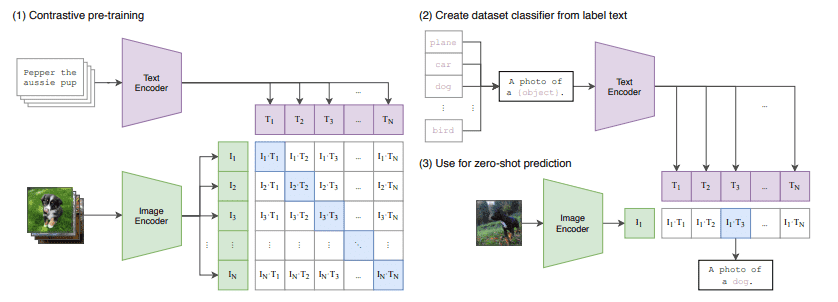

In [ ]:
# image_encoder - ResNet, или визуальный трансформер
# text_encoder - CBOW, или текстовый трансформер


# I[n, h, w, c] - мини-пакет связанных изображений
# T[n, l] - мини-пакет связанных текстов
# W_i[d_i, d_e] - изученная проекция эмбеддингов изображения
# W_t[d_t, d_e] - изученная проекция эмбеддингов текста
# t - изученное значение температуры


# полученные представления признаков данных каждой модальности
I_f = image_encoder(I) #[n, d_i]
T_f = text_encoder(T) #[n, d_t]


# общий эмбеддинг мультимодальных входных данных [n, d_e]
I_e = l2_normalize(np.dot(I_f, W_i), axis=1)
T_e = l2_normalize(np.dot(T_f, W_t), axis=1)


# попарно масштабированные косинусные сходства [n, n]
logits = np.dot(I_e, T_e.T) * np.exp(t)


# функция симметричных потерь
labels = np.arange(n)
loss_i = cross_entropy_loss(logits, labels, axis=0)
loss_t = cross_entropy_loss(logits, labels, axis=1)
loss = (loss_i + loss_t)/2

CLIP плохо справляется с абстрактными понятиями и слабо генерализирует изображения, не охваченные данными для предобучения.

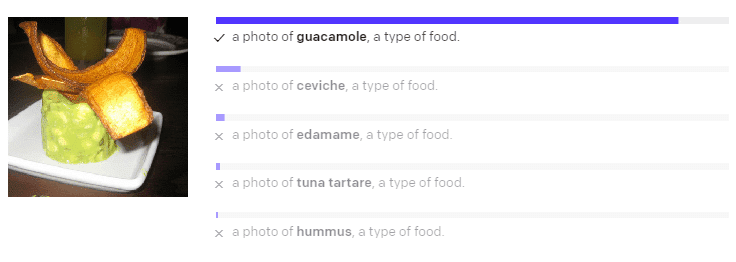

### Улучшенные векторные представления визуальных данных

Если тексты в основном кодируются модулями типа трансформеров, то кодирование визуальных данных остается полем для исследований. За несколько лет испытывались различные подходы. Изображения обрабатывались с помощью стандартного CNN, ResNet или трансформеров. В DALL-E для сжатия визуальной информации в скрытом пространстве даже использовался dVAE. Это можно сравнить с преобразованием слов в скрытый набор эмбеддингов, из которых составлялся словарь, только для фрагментов изображений. Сейчас, однако, в приоритете разработка улучшенных модулей кодирования изображений.

#### VinVL
С этой целью создатели VinVL, используя четыре публичных набора данных, предобучили новую модель обнаруживать объекты. Затем они добавили ветвь attribute/атрибут (=небольшое текстовое описание к изображению) и доработали ее, после чего модель научилась обнаруживать и объекты, и атрибуты.

Созданная объектно-атрибутная модель — по сути модификация модели Faster-RCNN. Ее можно использовать для получения точных представлений изображений.

#### SimVLM

В SimVLM, напротив, используется версия визуального трансформера (Vit). Здесь хорошо известный алгоритм проекции фрагментов изображений заменили тремя блоками ResNet, чтобы получить векторы этих фрагментов (см. этап “Conv Stage” на рисунке ниже). Эти блоки обучаются вместе со всей моделью, в отличие от других методов, где используется полностью предобученный модуль изображения.

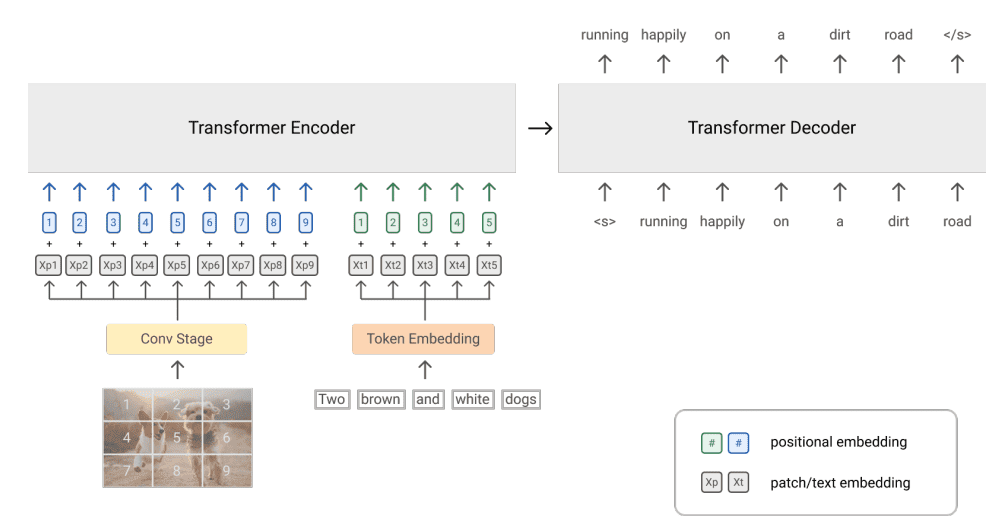

# ML часть финального проекта

Необходимо написать пайплан, который на вход принимает русский текст и генерирует видео по запросу

## Как выглядят text2video модели?

Вот пример диффузионной модели

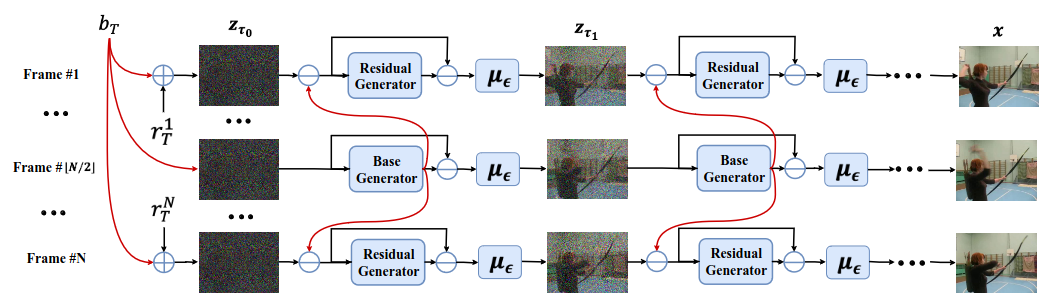

Можно также потыкать https://github.com/AUTOMATIC1111/stable-diffusion-webui